# print


In [ ]:
name = 'Fred'

# Using the old .format() method:
print('His name is {var}.'.format(var=name))
# His name is Fred.

# Using f-strings:
print(f'His name is {name}.')
# His name is Fred.

print(f'His name is {name!r}')
# His name is 'Fred'

d = {'a':123,'b':456}
print(f"Address: {d['a']} Main Street")
# Address: 123 Main Street

library = [('Author', 'Topic', 'Pages'), ('Twain', 'Rafting', 601), ('Feynman', 'Physics', 95), ('Hamilton', 'Mythology', 144)]
for book in library:
    print(f'{book[0]:{10}} {book[1]:{10}} {book[2]:.>{7}}') # here .> was added
# Author     Topic      ..Pages
# Twain      Rafting    ....601
# Feynman    Physics    .....95
# Hamilton   Mythology  ....144

from datetime import datetime
today = datetime(year=2018, month=1, day=27)
print(f'{today:%B %d, %Y}')
#January 27, 2018

print(today)
#2018-01-27 00:00:00

# Files


In [ ]:
%%writefile test.txt
Hello, this is a quick test file.
This is the second line of the file.
''' Overwriting test.txt '''

# Open the text.txt file we created earlier
my_file = open('test.txt')

my_file
''' <_io.TextIOWrapper name='test.txt' mode='r' encoding='UTF-8'> '''


### .read() and .seek() ###
# We can now read the file
my_file.read()
''' Hello, this is a quick test file.\nThis is the second line of the file.\n'''

# But what happens if we try to read it again?
my_file.read()
''' '' '''

# Seek to the start of file (index 0)
my_file.seek(0)
# Now read again
my_file.read()
''' Hello, this is a quick test file.\nThis is the second line of the file.\n '''

### .readlines() ###
# Readlines returns a list of the lines in the file
my_file.seek(0)
my_file.readlines()
''' ['Hello, this is a quick test file.\n',
  'This is the second line of the file.\n'] '''


### Writing to a File ###
# Add a second argument to the function, 'w' which stands for write.
# Passing 'w+' lets us read and write to the file
my_file = open('test.txt','w+')
# Write to the file
my_file.write('This is a new first line')
'''  24 '''
# Read the file
my_file.seek(0)
my_file.read()
''' This is a new first line '''

### Appending to a File ###
my_file = open('test.txt','a+')
my_file.write('\nThis line is being appended to test.txt')
my_file.write('\nAnd another line here.')
'''  23 '''
my_file.seek(0)
print(my_file.read())
 '''This is a new first line
    This line is being appended to test.txt
    And another line here.
    '''


### Appending with %%writefile ###
%%writefile -a test.txt
This is more text being appended to test.txt
And another line here.
''' Appending to test.txt '''
### Aliases and Context Managers ###
with open('test.txt','r') as txt:
    first_line = txt.readlines()[0]
print(first_line)
''' This is a new first line '''

### Iterating through a File ###
with open('test.txt','r') as txt:
    for line in txt:
        print(line, end='')  # the end='' argument removes extra linebreaks
        '''
This is a new first line
This line is being appended to test.txt
And another line here.
This is more text being appended to test.txt
And another line here.
'''


Overwriting test.txt


In [ ]:
!pip install jupyter_contrib_nbextensions


This is a new first line
This line is being appended to test.txt
And another line here.


In [ ]:
!jupyter nbextension enable hinterland/hinterland


Enabling notebook extension hinterland/hinterland...
      - Validating: problems found:
        - require?  X hinterland/hinterland


# Regx

In [ ]:
import re


text = "The agent's phone number is 408-555-1234. Call soon!"
pattern = 'phone'
re.search(pattern,text)
'''<_sre.SRE_Match object; span=(12, 17), match='phone'>'''

pattern = "NOT IN TEXT"
re.search(pattern,text)
''' None'''

pattern = 'phone'
match = re.search(pattern,text)
match
'''<_sre.SRE_Match object; span=(12, 17), match='phone'>'''

match.span()
'''(12, 17)'''

match.start()
'''12'''
match.end()
'''17'''
### But what if the pattern occurs more than once? ###
text = "my phone is a new phone"
match = re.search("phone",text)
match.span()
'''(3, 8)'''


### Notice it only matches the first instance. If we wanted a list of all matches, we can use .findall() method: ###
matches = re.findall("phone",text)
matches
'''['phone', 'phone']'''
len(matches)
'''2'''

### To get actual match objects, use the iterator:###
for match in re.finditer("phone",text):
    print(match.span())

'''(3, 8)
(18, 23)'''


### If you wanted the actual text that matched, you can use the .group() method. ###
match.group()
'''  'phone' '''

(3, 8)
(18, 23)


"  'phone' "

## Patterns

So far we've learned how to search for a basic string. What about more complex examples? Such as trying to find a telephone number in a large string of text? Or an email address?

We could just use search method if we know the exact phone or email, but what if we don't know it? We may know the general format, and we can use that along with regular expressions to search the document for strings that match a particular pattern.

This is where the syntax may appear strange at first, but take your time with this; often it's just a matter of looking up the pattern code.

Let's begin!

### Identifiers for Characters in Patterns

Characters such as a digit or a single string have different codes that represent them. You can use these to build up a pattern string. Notice how these make heavy use of the backwards slash \ . Because of this when defining a pattern string for regular expression we use the format:

    r'mypattern'
    
placing the r in front of the string allows python to understand that the \ in the pattern string are not meant to be escape slashes.

Below you can find a table of all the possible identifiers:

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >\d</span></td><td>A digit</td><td>file_\d\d</td><td>file_25</td></tr>

<tr ><td><span >\w</span></td><td>Alphanumeric</td><td>\w-\w\w\w</td><td>A-b_1</td></tr>



<tr ><td><span >\s</span></td><td>White space</td><td>a\sb\sc</td><td>a b c</td></tr>



<tr ><td><span >\D</span></td><td>A non digit</td><td>\D\D\D</td><td>ABC</td></tr>

<tr ><td><span >\W</span></td><td>Non-alphanumeric</td><td>\W\W\W\W\W</td><td>*-+=)</td></tr>

<tr ><td><span >\S</span></td><td>Non-whitespace</td><td>\S\S\S\S</td><td>Yoyo</td></tr></table>

For example:

In [ ]:
text = "My telephone number is 408-555-1234"
phone = re.search(r'\d\d\d-\d\d\d-\d\d\d\d',text)
phone = re.search(r'\d\d\d-\d\d\d-\d\d\d\d',text)
''' '408-555-1234'''

" '408-555-1234"

Notice the repetition of \d. That is a bit of an annoyance, especially if we are looking for very long strings of numbers. Let's explore the possible quantifiers.

### Quantifiers

Now that we know the special character designations, we can use them along with quantifiers to define how many we expect.

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >+</span></td><td>Occurs one or more times</td><td>	Version \w-\w+</td><td>Version A-b1_1</td></tr>

<tr ><td><span >{3}</span></td><td>Occurs exactly 3 times</td><td>\D{3}</td><td>abc</td></tr>



<tr ><td><span >{2,4}</span></td><td>Occurs 2 to 4 times</td><td>\d{2,4}</td><td>123</td></tr>



<tr ><td><span >{3,}</span></td><td>Occurs 3 or more</td><td>\w{3,}</td><td>anycharacters</td></tr>

<tr ><td><span >\*</span></td><td>Occurs zero or more times</td><td>A\*B\*C*</td><td>AAACC</td></tr>

<tr ><td><span >?</span></td><td>Once or none</td><td>plurals?</td><td>plural</td></tr></table>

Let's rewrite our pattern using these quantifiers:

In [ ]:
re.search(r'\d{3}-\d{3}-\d{4}',text)

<_sre.SRE_Match object; span=(23, 35), match='408-555-1234'>

### Groups

What if we wanted to do two tasks, find phone numbers, but also be able to quickly extract their area code (the first three digits). We can use groups for any general task that involves grouping together regular expressions (so that we can later break them down). 

Using the phone number example, we can separate groups of regular expressions using parentheses:

In [ ]:
phone_pattern = re.compile(r'(\d{3})-(\d{3})-(\d{4})')

results = re.search(phone_pattern,text)

# The entire result
results.group()
''' '408-555-1234' '''

# Can then also call by group position.
# remember groups were separated by parentheses ()
# Something to note is that group ordering starts at 1. Passing in 0 returns everything
results.group(1)
''' '408' '''
results.group(2)
''' '555' '''
results.group(3)
''' '1234' '''
# We only had three groups of parentheses
results.group(4)
'''
---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-32-79a918a9b5dc> in <module>()
      1 # We only had three groups of parentheses
----> 2 results.group(4)

IndexError: no such group
'''


### Additional Regex Syntax

#### Or operator |

Use the pipe operator to have an **or** statment. For example

In [ ]:
re.search(r"man|woman","This man was here.")
''' <_sre.SRE_Match object; span=(5, 8), match='man'> '''

re.search(r"man|woman","This woman was here.")
''' <_sre.SRE_Match object; span=(5, 10), match='woman'> '''

" <_sre.SRE_Match object; span=(5, 10), match='woman'> "

#### The Wildcard Character

Use a "wildcard" as a placement that will match any character placed there. You can use a simple period **.** for this. For example:

In [ ]:
re.findall(r".at","The cat in the hat sat here.")
''' ['cat', 'hat', 'sat'] '''

re.findall(r".at","The bat went splat")
''' ['bat', 'lat'] '''



" ['bat', 'lat'] "

Notice how we only matched the first 3 letters, that is because we need a **.** for each wildcard letter. Or use the quantifiers described above to set its own rules.

In [ ]:
re.findall(r"...at","The bat went splat")

['e bat', 'splat']

However this still leads the problem to grabbing more beforehand. Really we only want words that end with "at".

In [ ]:
# One or more non-whitespace that ends with 'at'
re.findall(r'\S+at',"The bat went splat")

['bat', 'splat']

#### Starts With and Ends With

We can use the **^** to signal starts with, and the **$** to signal ends with:

In [ ]:
# Ends with a number
re.findall(r'\d$','This ends with a number 2')
''' ['2'] '''
# Starts with a number
re.findall(r'^\d','1 is the loneliest number.')
''' ['1'] '''

Note that this is for the entire string, not individual words!

#### Exclusion

To exclude characters, we can use the **^** symbol in conjunction with a set of brackets **[]**. Anything inside the brackets is excluded. For example:

In [ ]:
phrase = "there are 3 numbers 34 inside 5 this sentence."

In [ ]:
re.findall(r'[^\d]',phrase)

['t',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 ' ',
 'n',
 'u',
 'm',
 'b',
 'e',
 'r',
 's',
 ' ',
 ' ',
 'i',
 'n',
 's',
 'i',
 'd',
 'e',
 ' ',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 's',
 'e',
 'n',
 't',
 'e',
 'n',
 'c',
 'e',
 '.']

To get the words back together, use a + sign 

In [ ]:
re.findall(r'[^\d]+',phrase)

['there are ', ' numbers ', ' inside ', ' this sentence.']

We can use this to remove punctuation from a sentence.

In [ ]:
test_phrase = 'This is a string! But it has punctuation. How can we remove it?'

In [ ]:
re.findall('[^!.? ]+',test_phrase)

['This',
 'is',
 'a',
 'string',
 'But',
 'it',
 'has',
 'punctuation',
 'How',
 'can',
 'we',
 'remove',
 'it']

In [ ]:
clean = ' '.join(re.findall('[^!.? ]+',test_phrase))

In [ ]:
clean

'This is a string But it has punctuation How can we remove it'

### Brackets for Grouping

As we showed above we can use brackets to group together options, for example if we wanted to find hyphenated words:

In [ ]:
text = 'Only find the hypen-words in this sentence. But you do not know how long-ish they are'

In [ ]:
re.findall(r'[\w]+-[\w]+',text)

['hypen-words', 'long-ish']

### Parentheses for Multiple Options

If we have multiple options for matching, we can use parentheses to list out these options. For Example:

In [ ]:
# Find words that start with cat and end with one of these options: 'fish','nap', or 'claw'
text = 'Hello, would you like some catfish?'
texttwo = "Hello, would you like to take a catnap?"
textthree = "Hello, have you seen this caterpillar?"

In [ ]:
re.search(r'cat(fish|nap|claw)',text)

<_sre.SRE_Match object; span=(27, 34), match='catfish'>

In [ ]:
re.search(r'cat(fish|nap|claw)',texttwo)

<_sre.SRE_Match object; span=(32, 38), match='catnap'>

In [ ]:
# None returned
re.search(r'cat(fish|nap|claw)',textthree)

### Conclusion

Excellent work! For full information on all possible patterns, check out: https://docs.python.org/3/howto/regex.html

# Working with spaCy in Python

In [ ]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)
'''
Tesla PROPN nsubj
is VERB aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj'''

This doesn't look very user-friendly, but right away we see some interesting things happen:
1. Tesla is recognized to be a Proper Noun, not just a word at the start of a sentence
2. U.S. is kept together as one entity (we call this a 'token')

As we dive deeper into spaCy we'll see what each of these abbreviations mean and how they're derived. We'll also see how spaCy can interpret the last three tokens combined `$6 million` as referring to ***money***.

___
## spaCy Objects

After importing the spacy module in the cell above we loaded a **model** and named it `nlp`.<br>Next we created a **Doc** object by applying the model to our text, and named it `doc`.<br>spaCy also builds a companion **Vocab** object that we'll cover in later sections.<br>The **Doc** object that holds the processed text is our focus here.

___
## Pipeline
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.   Image source: https://spacy.io/usage/spacy-101#pipelines

<a href='http://www.pieriandata.com'><img src="../pipeline1.png" width="600">

We can check to see what components currently live in the pipeline. In later sections we'll learn how to disable components and add new ones as needed.

In [ ]:
nlp.pipeline

[('tagger', <spacy.pipeline.Tagger at 0x237cb1e8f98>),
 ('parser', <spacy.pipeline.DependencyParser at 0x237cb2852b0>),
 ('ner', <spacy.pipeline.EntityRecognizer at 0x237cb285360>)]

In [ ]:
nlp.pipe_names

['tagger', 'parser', 'ner']

___
### Tokenization
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information. We'll go into much more detail on tokenization in an upcoming lecture. For now, let's look at another example:

In [ ]:
doc2 = nlp(u"Tesla isn't   looking into startups anymore.")

for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is VERB aux
n't ADV neg
   SPACE 
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


Notice how `isn't` has been split into two tokens. spaCy recognizes both the root verb `is` and the negation attached to it. Notice also that both the extended whitespace and the period at the end of the sentence are assigned their own tokens.

It's important to note that even though `doc2` contains processed information about each token, it also retains the original text:

In [ ]:
doc2

Tesla isn't   looking into startups anymore.

In [ ]:
doc2[0]

Tesla

In [ ]:
type(doc2)

spacy.tokens.doc.Doc

___
### Part-of-Speech Tagging (POS)
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

In [ ]:
doc2[0].pos_

'PROPN'

___
### Dependencies
We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing
<br>A good explanation of typed dependencies can be found [here](https://nlp.stanford.edu/software/dependencies_manual.pdf)

In [ ]:
doc2[0].dep_

'nsubj'

To see the full name of a tag use `spacy.explain(tag)`

In [ ]:
spacy.explain('PROPN')

'proper noun'

In [ ]:
spacy.explain('nsubj')

'nominal subject'

___
### Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [ ]:
# Lemmas (the base form of the word):
print(doc2[4].text)
print(doc2[4].lemma_)

looking
look


In [ ]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc2[4].pos_)
print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

VERB
VBG / verb, gerund or present participle


In [ ]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla: Xxxxx
U.S. : X.X.


In [ ]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
False


___
### Spans
Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [ ]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [ ]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [ ]:
type(life_quote)

spacy.tokens.span.Span

In upcoming lectures we'll see how to create Span objects using `Span()`. This will allow us to assign additional information to the Span.

___
### Sentences
Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. Later we'll write our own segmentation rules.

In [ ]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [ ]:
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [ ]:
doc4[6].is_sent_start

True

## Tokenization
The first step in creating a `Doc` object is to break down the incoming text into component pieces or "tokens".

In [ ]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Create a string that includes opening and closing quotation marks
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [ ]:
# Create a Doc object and explore tokens
doc = nlp(mystring)

for token in doc:
    print(token.text, end=' | ')

" | We | 're | moving | to | L.A. | ! | " | 

<img src="../tokenization.png" width="600">

-  **Prefix**:	Character(s) at the beginning &#9656; `$ ( “ ¿`
-  **Suffix**:	Character(s) at the end &#9656; `km ) , . ! ”`
-  **Infix**:	Character(s) in between &#9656; `- -- / ...`
-  **Exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied &#9656; `St. U.S.`

Notice that tokens are pieces of the original text. That is, we don't see any conversion to word stems or lemmas (base forms of words) and we haven't seen anything about organizations/places/money etc. Tokens are the basic building blocks of a Doc object - everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another.

### Prefixes, Suffixes and Infixes
spaCy will isolate punctuation that does *not* form an integral part of a word. Quotation marks, commas, and punctuation at the end of a sentence will be assigned their own token. However, punctuation that exists as part of an email address, website or numerical value will be kept as part of the token.

In [ ]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com!")

for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


<font color=green>Note that the exclamation points, comma, and the hyphen in 'snail-mail' are assigned their own tokens, yet both the email address and website are preserved.</font>

In [ ]:
doc3 = nlp(u'A 5km NYC cab ride costs $10.30')

for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


<font color=green>Here the distance unit and dollar sign are assigned their own tokens, yet the dollar amount is preserved.</font>

### Exceptions
Punctuation that exists as part of a known abbreviation will be kept as part of the token.

In [ ]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


<font color=green>Here the abbreviations for "Saint" and "United States" are both preserved.</font>

### Counting Tokens
`Doc` objects have a set number of tokens:

In [ ]:
len(doc)

8

### Counting Vocab Entries
`Vocab` objects contain a full library of items!

In [ ]:
len(doc.vocab)

57852

<font color=green>NOTE: This number changes based on the language library loaded at the start, and any new lexemes introduced to the `vocab` when the `Doc` was created.</font>

### Tokens can be retrieved by index position and slice
`Doc` objects can be thought of as lists of `token` objects. As such, individual tokens can be retrieved by index position, and spans of tokens can be retrieved through slicing:

In [ ]:
doc5 = nlp(u'It is better to give than to receive.')

# Retrieve the third token:
doc5[2]

better

In [ ]:
# Retrieve three tokens from the middle:
doc5[2:5]

better to give

In [ ]:
# Retrieve the last four tokens:
doc5[-4:]

than to receive.

### Tokens cannot be reassigned
Although `Doc` objects can be considered lists of tokens, they do *not* support item reassignment:

In [ ]:
doc6 = nlp(u'My dinner was horrible.')
doc7 = nlp(u'Your dinner was delicious.')

In [ ]:
# Try to change "My dinner was horrible" to "My dinner was delicious"
doc6[3] = doc7[3]

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

___
## Named Entities
Going a step beyond tokens, *named entities* add another layer of context. The language model recognizes that certain words are organizational names while others are locations, and still other combinations relate to money, dates, etc. Named entities are accessible through the `ents` property of a `Doc` object.

In [ ]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


<font color=green>Note how two tokens combine to form the entity `Hong Kong`, and three tokens combine to form the monetary entity:  `$6 million`</font>

In [ ]:
len(doc8.ents)

3

Named Entity Recognition (NER) is an important machine learning tool applied to Natural Language Processing.<br>We'll do a lot more with it in an upcoming section. For more info on **named entities** visit https://spacy.io/usage/linguistic-features#named-entities

---
## Noun Chunks
Similar to `Doc.ents`, `Doc.noun_chunks` are another object property. *Noun chunks* are "base noun phrases" – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, in [Sheb Wooley's 1958 song](https://en.wikipedia.org/wiki/The_Purple_People_Eater), a *"one-eyed, one-horned, flying, purple people-eater"* would be one long noun chunk.

In [ ]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [ ]:
doc10 = nlp(u"Red cars do not carry higher insurance rates.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

Red cars
higher insurance rates


In [ ]:
doc11 = nlp(u"He was a one-eyed, one-horned, flying, purple people-eater.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

He
a one-eyed, one-horned, flying, purple people-eater


We'll look at additional noun_chunks components besides `.text` in an upcoming section.<br>For more info on **noun_chunks** visit https://spacy.io/usage/linguistic-features#noun-chunks

___
## Built-in Visualizers

spaCy includes a built-in visualization tool called **displaCy**. displaCy is able to detect whether you're working in a Jupyter notebook, and will return markup that can be rendered in a cell right away. When you export your notebook, the visualizations will be included as HTML.

For more info visit https://spacy.io/usage/visualizers

### Visualizing the dependency parse
Run the cell below to import displacy and display the dependency graphic

In [ ]:
from spacy import displacy

doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

The optional `'distance'` argument sets the distance between tokens. If the distance is made too small, text that appears beneath short arrows may become too compressed to read.

### Visualizing the entity recognizer

In [ ]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc, style='ent', jupyter=True)

___
### Creating Visualizations Outside of Jupyter
If you're using another Python IDE or writing a script, you can choose to have spaCy serve up html separately:

In [ ]:
doc = nlp(u'This is a sentence.')
displacy.serve(doc, style='dep')


    Serving on port 5000...
    Using the 'dep' visualizer


    Shutting down server on port 5000.



<font color=blue>**After running the cell above, click the link below to view the dependency parse**:</font>

http://127.0.0.1:5000
<br><br>
<font color=red>**To shut down the server and return to jupyter**, interrupt the kernel either through the **Kernel** menu above, by hitting the black square on the toolbar, or by typing the keyboard shortcut `Esc`, `I`, `I`</font>

Great! Now you should have an understanding of how tokenization divides text up into individual elements, how named entities provide context, and how certain tools help to visualize grammar rules and entity labels.
### Next up: Stemming

## Stemming
Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for "boat" might also return "boats" and "boating". Here, "boat" would be the **stem** for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required. In fact, spaCy doesn't include a stemmer, opting instead to rely entirely on lemmatization. For those interested, there's some background on this decision [here](https://github.com/explosion/spaCy/issues/327). We discuss the virtues of *lemmatization* in the next section.

Instead, we'll use another popular NLP tool called **nltk**, which stands for *Natural Language Toolkit*. For more information on nltk visit https://www.nltk.org/

### Porter Stemmer

One of the most common - and effective - stemming tools is [*Porter's Algorithm*](https://tartarus.org/martin/PorterStemmer/) developed by Martin Porter in [1980](https://tartarus.org/martin/PorterStemmer/def.txt). The algorithm employs five phases of word reduction, each with its own set of mapping rules. In the first phase, simple suffix mapping rules are defined, such as:

![stemming1.png](../stemming1.png)

From a given set of stemming rules only one rule is applied, based on the longest suffix S1. Thus, `caresses` reduces to `caress` but not `cares`.

More sophisticated phases consider the length/complexity of the word before applying a rule. For example:

![stemming1.png](../stemming2.png)

Here `m>0` describes the "measure" of the stem, such that the rule is applied to all but the most basic stems.

In [ ]:
# Import the toolkit and the full Porter Stemmer library
import nltk

from nltk.stem.porter import *

In [ ]:
p_stemmer = PorterStemmer()

In [ ]:
words = ['run','runner','running','ran','runs','easily','fairly']

In [ ]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


<font color=green>Note how the stemmer recognizes "runner" as a noun, not a verb form or participle. Also, the adverbs "easily" and "fairly" are stemmed to the unusual root "easili" and "fairli"</font>
___

### Snowball Stemmer
This is somewhat of a misnomer, as Snowball is the name of a stemming language developed by Martin Porter. The algorithm used here is more acurately called the "English Stemmer" or "Porter2 Stemmer". It offers a slight improvement over the original Porter stemmer, both in logic and speed. Since **nltk** uses the name SnowballStemmer, we'll use it here.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

In [ ]:
words = ['run','runner','running','ran','runs','easily','fairly']
# words = ['generous','generation','generously','generate']

In [ ]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


<font color=green>In this case the stemmer performed the same as the Porter Stemmer, with the exception that it handled the stem of "fairly" more appropriately with "fair"</font>
___

### Try it yourself!
##### Pass in some of your own words and test each stemmer on them. Remember to pass them as strings!

In [ ]:
words = ['consolingly']

In [ ]:
print('Porter Stemmer:')
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

Porter Stemmer:
consolingly --> consolingli


In [ ]:
print('Porter2 Stemmer:')
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

Porter2 Stemmer:
consolingly --> consol


___
Stemming has its drawbacks. If given the token `saw`, stemming might always return `saw`, whereas lemmatization would likely return either `see` or `saw` depending on whether the use of the token was as a verb or a noun. As an example, consider the following:

In [ ]:
phrase = 'I am meeting him tomorrow at the meeting'
for word in phrase.split():
    print(word+' --> '+p_stemmer.stem(word))

I --> I
am --> am
meeting --> meet
him --> him
tomorrow --> tomorrow
at --> at
the --> the
meeting --> meet


Here the word "meeting" appears twice - once as a verb, and once as a noun, and yet the stemmer treats both equally.

## Lemmatization
In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a *morphological analysis* to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

In [ ]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 561228191312463089 	 -PRON-
am 	 VERB 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 ADP 	 16950148841647037698 	 because
I 	 PRON 	 561228191312463089 	 -PRON-
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 ADP 	 10066841407251338481 	 since
I 	 PRON 	 561228191312463089 	 -PRON-
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


<font color=green>In the above sentence, `running`, `run` and `ran` all point to the same lemma `run` (...11841) to avoid duplication.</font>

#### Function to display lemmas
Since the display above is staggared and hard to read, let's write a function that displays the information we want more neatly.

In [ ]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

Here we're using an **f-string** to format the printed text by setting minimum field widths and adding a left-align to the lemma hash value.

In [ ]:
doc2 = nlp(u"I saw eighteen mice today!")

show_lemmas(doc2)

I            PRON   561228191312463089     -PRON-
saw          VERB   11925638236994514241   see
eighteen     NUM    9609336664675087640    eighteen
mice         NOUN   1384165645700560590    mouse
today        NOUN   11042482332948150395   today
!            PUNCT  17494803046312582752   !


<font color=green>Notice that the lemma of `saw` is `see`, `mice` is the plural form of `mouse`, and yet `eighteen` is its own number, *not* an expanded form of `eight`.</font>

In [ ]:
doc3 = nlp(u"I am meeting him tomorrow at the meeting.")

show_lemmas(doc3)

I            PRON   561228191312463089     -PRON-
am           VERB   10382539506755952630   be
meeting      VERB   6880656908171229526    meet
him          PRON   561228191312463089     -PRON-
tomorrow     NOUN   3573583789758258062    tomorrow
at           ADP    11667289587015813222   at
the          DET    7425985699627899538    the
meeting      NOUN   14798207169164081740   meeting
.            PUNCT  12646065887601541794   .


<font color=green>Here the lemma of `meeting` is determined by its Part of Speech tag.</font>

In [ ]:
doc4 = nlp(u"That's an enormous automobile")

show_lemmas(doc4)

That         DET    4380130941430378203    that
's           VERB   10382539506755952630   be
an           DET    15099054000809333061   an
enormous     ADJ    17917224542039855524   enormous
automobile   NOUN   7211811266693931283    automobile


<font color=green>Note that lemmatization does *not* reduce words to their most basic synonym - that is, `enormous` doesn't become `big` and `automobile` doesn't become `car`.</font>

We should point out that although lemmatization looks at surrounding text to determine a given word's part of speech, it does not categorize phrases. In an upcoming lecture we'll investigate *word vectors and similarity*.



## Stop Words
Words like "a" and "the" appear so frequently that they don't require tagging as thoroughly as nouns, verbs and modifiers. We call these *stop words*, and they can be filtered from the text to be processed. spaCy holds a built-in list of some 305 English stop words.

In [ ]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'hers', 'show', 'though', 'various', 'sixty', 'say', 'quite', 'ten', 'anything', 'although', 'hereby', 'in', 'ours', 'herself', 'among', 'unless', 'and', 'whole', 'anywhere', 'latter', 'therein', 'whereafter', 'that', 'one', 'whose', 'either', 'within', 'eight', 'three', 'latterly', 'anyone', 'a', 'less', 'former', 'been', 'same', 'anyway', 'else', 'cannot', 'five', 'i', 'until', 'last', 'thus', 'give', 'move', 'thereafter', 'via', 'than', 'empty', 'off', 'neither', 'too', 'please', 'over', 'just', 'otherwise', 'has', 'her', 'put', 'its', 'whether', 'herein', 'myself', 'me', 'nevertheless', 'whatever', 'someone', 'towards', 'whereby', 'onto', 'sometimes', 'thence', 'them', 'done', 'at', 'back', 'nor', 'another', 'behind', 'together', 'take', 'amongst', 'being', 'seemed', 'seeming', 'fifteen', 'do', 'further', 'something', 'again', 'this', 'were', 'wherein', 'how', 'up', 'must', 'get', 'whereas', 'much', 'upon', 'yet', 'both', 'many', 'very', 'may', 'after', 'regarding', 'full', 'throu

In [ ]:
len(nlp.Defaults.stop_words)

305

### To see if a word is a stop word

In [ ]:
nlp.vocab['myself'].is_stop

True

In [ ]:
nlp.vocab['mystery'].is_stop

False

### To add a stop word
There may be times when you wish to add a stop word to the default set. Perhaps you decide that `'btw'` (common shorthand for "by the way") should be considered a stop word.

In [ ]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw')

# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True

In [ ]:
len(nlp.Defaults.stop_words)

306

In [ ]:
nlp.vocab['btw'].is_stop

True

<font color=green>When adding stop words, always use lowercase. Lexemes are converted to lowercase before being added to **vocab**.</font>

### To remove a stop word
Alternatively, you may decide that `'beyond'` should not be considered a stop word.

In [ ]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('beyond')

# Remove the stop_word tag from the lexeme
nlp.vocab['beyond'].is_stop = False

In [ ]:
len(nlp.Defaults.stop_words)

305

In [ ]:
nlp.vocab['beyond'].is_stop

False

Great! Now you should be able to access spaCy's default set of stop words, and add or remove stop words as needed.


## Vocabulary and Matching
So far we've seen how a body of text is divided into tokens, and how individual tokens are parsed and tagged with parts of speech, dependencies and lemmas.

In this section we will identify and label specific phrases that match patterns we can define ourselves. 

### Rule-based Matching
spaCy offers a rule-matching tool called `Matcher` that allows you to build a library of token patterns, then match those patterns against a Doc object to return a list of found matches. You can match on any part of the token including text and annotations, and you can add multiple patterns to the same matcher.

In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Import the Matcher library
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

<font color=green>Here `matcher` is an object that pairs to the current `Vocab` object. We can add and remove specific named matchers to `matcher` as needed.</font>

#### Creating patterns
In literature, the phrase 'solar power' might appear as one word or two, with or without a hyphen. In this section we'll develop a matcher named 'SolarPower' that finds all three:

In [ ]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

matcher.add('SolarPower', None, pattern1, pattern2, pattern3)

Let's break this down:
* `pattern1` looks for a single token whose lowercase text reads 'solarpower'
* `pattern2` looks for two adjacent tokens that read 'solar' and 'power' in that order
* `pattern3` looks for three adjacent tokens, with a middle token that can be any punctuation.<font color=green>*</font>

<font color=green>\* Remember that single spaces are not tokenized, so they don't count as punctuation.</font>
<br>Once we define our patterns, we pass them into `matcher` with the name 'SolarPower', and set *callbacks* to `None` (more on callbacks later).

#### Applying the matcher to a Doc object

In [ ]:
doc = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [ ]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


`matcher` returns a list of tuples. Each tuple contains an ID for the match, with start & end tokens that map to the span `doc[start:end]`

In [ ]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 10 11 solarpower
8656102463236116519 SolarPower 13 16 Solar-power


The `match_id` is simply the hash value of the `string_ID` 'SolarPower'

#### Setting pattern options and quantifiers
You can make token rules optional by passing an `'OP':'*'` argument. This lets us streamline our patterns list:

In [ ]:
# Redefine the patterns:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]

# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', None, pattern1, pattern2)

In [ ]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


This found both two-word patterns, with and without the hyphen!

The following quantifiers can be passed to the `'OP'` key:
<table><tr><th>OP</th><th>Description</th></tr>

<tr ><td><span >\!</span></td><td>Negate the pattern, by requiring it to match exactly 0 times</td></tr>
<tr ><td><span >?</span></td><td>Make the pattern optional, by allowing it to match 0 or 1 times</td></tr>
<tr ><td><span >\+</span></td><td>Require the pattern to match 1 or more times</td></tr>
<tr ><td><span >\*</span></td><td>Allow the pattern to match zero or more times</td></tr>
</table>


#### Be careful with lemmas!
If we wanted to match on both 'solar power' and 'solar powered', it might be tempting to look for the *lemma* of 'powered' and expect it to be 'power'. This is not always the case! The lemma of the *adjective* 'powered' is still 'powered':

In [ ]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LEMMA': 'power'}] # CHANGE THIS PATTERN

# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', None, pattern1, pattern2)

In [ ]:
doc2 = nlp(u'Solar-powered energy runs solar-powered cars.')

In [ ]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 0, 3)]


<font color=green>The matcher found the first occurrence because the lemmatizer treated 'Solar-powered' as a verb, but not the second as it considered it an adjective.<br>For this case it may be better to set explicit token patterns.</font>

In [ ]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solarpowered'}]
pattern4 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'powered'}]

# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', None, pattern1, pattern2, pattern3, pattern4)

In [ ]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 0, 3), (8656102463236116519, 5, 8)]


### Other token attributes
Besides lemmas, there are a variety of token attributes we can use to determine matching rules:
<table><tr><th>Attribute</th><th>Description</th></tr>

<tr ><td><span >`ORTH`</span></td><td>The exact verbatim text of a token</td></tr>
<tr ><td><span >`LOWER`</span></td><td>The lowercase form of the token text</td></tr>
<tr ><td><span >`LENGTH`</span></td><td>The length of the token text</td></tr>
<tr ><td><span >`IS_ALPHA`, `IS_ASCII`, `IS_DIGIT`</span></td><td>Token text consists of alphanumeric characters, ASCII characters, digits</td></tr>
<tr ><td><span >`IS_LOWER`, `IS_UPPER`, `IS_TITLE`</span></td><td>Token text is in lowercase, uppercase, titlecase</td></tr>
<tr ><td><span >`IS_PUNCT`, `IS_SPACE`, `IS_STOP`</span></td><td>Token is punctuation, whitespace, stop word</td></tr>
<tr ><td><span >`LIKE_NUM`, `LIKE_URL`, `LIKE_EMAIL`</span></td><td>Token text resembles a number, URL, email</td></tr>
<tr ><td><span >`POS`, `TAG`, `DEP`, `LEMMA`, `SHAPE`</span></td><td>The token's simple and extended part-of-speech tag, dependency label, lemma, shape</td></tr>
<tr ><td><span >`ENT_TYPE`</span></td><td>The token's entity label</td></tr>

</table>

#### Token wildcard
You can pass an empty dictionary `{}` as a wildcard to represent **any token**. For example, you might want to retrieve hashtags without knowing what might follow the `#` character:
>`[{'ORTH': '#'}, {}]`

___
### PhraseMatcher
In the above section we used token patterns to perform rule-based matching. An alternative - and often more efficient - method is to match on terminology lists. In this case we use PhraseMatcher to create a Doc object from a list of phrases, and pass that into `matcher` instead.

In [ ]:
# Perform standard imports, reset nlp
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

For this exercise we're going to import a Wikipedia article on *Reaganomics*<br>
Source: https://en.wikipedia.org/wiki/Reaganomics

In [ ]:
with open('../TextFiles/reaganomics.txt', encoding='utf8') as f:
    doc3 = nlp(f.read())

In [ ]:
# First, create a list of match phrases:
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

# Next, convert each phrase to a Doc object:
phrase_patterns = [nlp(text) for text in phrase_list]

# Pass each Doc object into matcher (note the use of the asterisk!):
matcher.add('VoodooEconomics', None, *phrase_patterns)

# Build a list of matches:
matches = matcher(doc3)

In [ ]:
# (match_id, start, end)
matches

[(3473369816841043438, 41, 45),
 (3473369816841043438, 49, 53),
 (3473369816841043438, 54, 56),
 (3473369816841043438, 61, 65),
 (3473369816841043438, 673, 677),
 (3473369816841043438, 2985, 2989)]

<font color=green>The first four matches are where these terms are used in the definition of Reaganomics:</font>

In [ ]:
doc3[:70]

REAGANOMICS
https://en.wikipedia.org/wiki/Reaganomics

Reaganomics (a portmanteau of [Ronald] Reagan and economics attributed to Paul Harvey)[1] refers to the economic policies promoted by U.S. President Ronald Reagan during the 1980s. These policies are commonly associated with supply-side economics, referred to as trickle-down economics or voodoo economics by political opponents, and free-market economics by political advocates.


### Viewing Matches
There are a few ways to fetch the text surrounding a match. The simplest is to grab a slice of tokens from the doc that is wider than the match:

In [ ]:
doc3[665:685]  # Note that the fifth match starts at doc3[673]

same time he attracted a following from the supply-side economics movement, which formed in opposition to Keynesian

In [ ]:
doc3[2975:2995]  # The sixth match starts at doc3[2985]

against institutions.[66] His policies became widely known as "trickle-down economics", due to the significant

Another way is to first apply the `sentencizer` to the Doc, then iterate through the sentences to the match point:

In [ ]:
# Build a list of sentences
sents = [sent for sent in doc3.sents]

# In the next section we'll see that sentences contain start and end token values:
print(sents[0].start, sents[0].end)

0 35


In [ ]:
# Iterate over the sentence list until the sentence end value exceeds a match start value:
for sent in sents:
    if matches[4][1] < sent.end:  # this is the fifth match, that starts at doc3[673]
        print(sent)
        break

At the same time he attracted a following from the supply-side economics movement, which formed in opposition to Keynesian demand-stimulus economics.


For additional information visit https://spacy.io/usage/linguistic-features#section-rule-based-matching


## Part of Speech Basics
The challenge of correctly identifying parts of speech is summed up nicely in the [spaCy docs](https://spacy.io/usage/linguistic-features):
<div class="alert alert-info" style="margin: 20px">Processing raw text intelligently is difficult: most words are rare, and it's common for words that look completely different to mean almost the same thing. The same words in a different order can mean something completely different. Even splitting text into useful word-like units can be difficult in many languages. While it's possible to solve some problems starting from only the raw characters, it's usually better to use linguistic knowledge to add useful information. That's exactly what spaCy is designed to do: you put in raw text, and get back a **Doc** object, that comes with a variety of annotations.</div>
In this section we'll take a closer look at coarse POS tags (noun, verb, adjective) and fine-grained tags (plural noun, past-tense verb, superlative adjective).

In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Create a simple Doc object
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

### View token tags
Recall that you can obtain a particular token by its index position.
* To view the coarse POS tag use `token.pos_`
* To view the fine-grained tag use `token.tag_`
* To view the description of either type of tag use `spacy.explain(tag)`

<div class="alert alert-success">Note that `token.pos` and `token.tag` return integer hash values; by adding the underscores we get the text equivalent that lives in **doc.vocab**.</div>

In [ ]:
# Print the full text:
print(doc.text)

The quick brown fox jumped over the lazy dog's back.


In [ ]:
# Print the fifth word and associated tags:
print(doc[4].text, doc[4].pos_, doc[4].tag_, spacy.explain(doc[4].tag_))

jumped VERB VBD verb, past tense


We can apply this technique to the entire Doc object:

In [ ]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

The        DET      DT     determiner
quick      ADJ      JJ     adjective
brown      ADJ      JJ     adjective
fox        NOUN     NN     noun, singular or mass
jumped     VERB     VBD    verb, past tense
over       ADP      IN     conjunction, subordinating or preposition
the        DET      DT     determiner
lazy       ADJ      JJ     adjective
dog        NOUN     NN     noun, singular or mass
's         PART     POS    possessive ending
back       NOUN     NN     noun, singular or mass
.          PUNCT    .      punctuation mark, sentence closer


### Coarse-grained Part-of-speech Tags
Every token is assigned a POS Tag from the following list:


<table><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>

___
### Fine-grained Part-of-speech Tags
Tokens are subsequently given a fine-grained tag as determined by morphology:
<table>
<tr><th>POS</th><th>Description</th><th>Fine-grained Tag</th><th>Description</th><th>Morphology</th></tr>
<tr><td>ADJ</td><td>adjective</td><td>AFX</td><td>affix</td><td>Hyph=yes</td></tr>
<tr><td>ADJ</td><td></td><td>JJ</td><td>adjective</td><td>Degree=pos</td></tr>
<tr><td>ADJ</td><td></td><td>JJR</td><td>adjective, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADJ</td><td></td><td>JJS</td><td>adjective, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADJ</td><td></td><td>PDT</td><td>predeterminer</td><td>AdjType=pdt PronType=prn</td></tr>
<tr><td>ADJ</td><td></td><td>PRP\$</td><td>pronoun, possessive</td><td>PronType=prs Poss=yes</td></tr>
<tr><td>ADJ</td><td></td><td>WDT</td><td>wh-determiner</td><td>PronType=int rel</td></tr>
<tr><td>ADJ</td><td></td><td>WP\$</td><td>wh-pronoun, possessive</td><td>Poss=yes PronType=int rel</td></tr>
<tr><td>ADP</td><td>adposition</td><td>IN</td><td>conjunction, subordinating or preposition</td><td></td></tr>
<tr><td>ADV</td><td>adverb</td><td>EX</td><td>existential there</td><td>AdvType=ex</td></tr>
<tr><td>ADV</td><td></td><td>RB</td><td>adverb</td><td>Degree=pos</td></tr>
<tr><td>ADV</td><td></td><td>RBR</td><td>adverb, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADV</td><td></td><td>RBS</td><td>adverb, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADV</td><td></td><td>WRB</td><td>wh-adverb</td><td>PronType=int rel</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>CC</td><td>conjunction, coordinating</td><td>ConjType=coor</td></tr>
<tr><td>DET</td><td>determiner</td><td>DT</td><td>determiner</td><td></td></tr>
<tr><td>INTJ</td><td>interjection</td><td>UH</td><td>interjection</td><td></td></tr>
<tr><td>NOUN</td><td>noun</td><td>NN</td><td>noun, singular or mass</td><td>Number=sing</td></tr>
<tr><td>NOUN</td><td></td><td>NNS</td><td>noun, plural</td><td>Number=plur</td></tr>
<tr><td>NOUN</td><td></td><td>WP</td><td>wh-pronoun, personal</td><td>PronType=int rel</td></tr>
<tr><td>NUM</td><td>numeral</td><td>CD</td><td>cardinal number</td><td>NumType=card</td></tr>
<tr><td>PART</td><td>particle</td><td>POS</td><td>possessive ending</td><td>Poss=yes</td></tr>
<tr><td>PART</td><td></td><td>RP</td><td>adverb, particle</td><td></td></tr>
<tr><td>PART</td><td></td><td>TO</td><td>infinitival to</td><td>PartType=inf VerbForm=inf</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>PRP</td><td>pronoun, personal</td><td>PronType=prs</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>NNP</td><td>noun, proper singular</td><td>NounType=prop Number=sign</td></tr>
<tr><td>PROPN</td><td></td><td>NNPS</td><td>noun, proper plural</td><td>NounType=prop Number=plur</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>-LRB-</td><td>left round bracket</td><td>PunctType=brck PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>-RRB-</td><td>right round bracket</td><td>PunctType=brck PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>,</td><td>punctuation mark, comma</td><td>PunctType=comm</td></tr>
<tr><td>PUNCT</td><td></td><td>:</td><td>punctuation mark, colon or ellipsis</td><td></td></tr>
<tr><td>PUNCT</td><td></td><td>.</td><td>punctuation mark, sentence closer</td><td>PunctType=peri</td></tr>
<tr><td>PUNCT</td><td></td><td>''</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>""</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>``</td><td>opening quotation mark</td><td>PunctType=quot PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>HYPH</td><td>punctuation mark, hyphen</td><td>PunctType=dash</td></tr>
<tr><td>PUNCT</td><td></td><td>LS</td><td>list item marker</td><td>NumType=ord</td></tr>
<tr><td>PUNCT</td><td></td><td>NFP</td><td>superfluous punctuation</td><td></td></tr>
<tr><td>SYM</td><td>symbol</td><td>#</td><td>symbol, number sign</td><td>SymType=numbersign</td></tr>
<tr><td>SYM</td><td></td><td>\$</td><td>symbol, currency</td><td>SymType=currency</td></tr>
<tr><td>SYM</td><td></td><td>SYM</td><td>symbol</td><td></td></tr>
<tr><td>VERB</td><td>verb</td><td>BES</td><td>auxiliary "be"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>HVS</td><td>forms of "have"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>MD</td><td>verb, modal auxiliary</td><td>VerbType=mod</td></tr>
<tr><td>VERB</td><td></td><td>VB</td><td>verb, base form</td><td>VerbForm=inf</td></tr>
<tr><td>VERB</td><td></td><td>VBD</td><td>verb, past tense</td><td>VerbForm=fin Tense=past</td></tr>
<tr><td>VERB</td><td></td><td>VBG</td><td>verb, gerund or present participle</td><td>VerbForm=part Tense=pres Aspect=prog</td></tr>
<tr><td>VERB</td><td></td><td>VBN</td><td>verb, past participle</td><td>VerbForm=part Tense=past Aspect=perf</td></tr>
<tr><td>VERB</td><td></td><td>VBP</td><td>verb, non-3rd person singular present</td><td>VerbForm=fin Tense=pres</td></tr>
<tr><td>VERB</td><td></td><td>VBZ</td><td>verb, 3rd person singular present</td><td>VerbForm=fin Tense=pres Number=sing Person=3</td></tr>
<tr><td>X</td><td>other</td><td>ADD</td><td>email</td><td></td></tr>
<tr><td>X</td><td></td><td>FW</td><td>foreign word</td><td>Foreign=yes</td></tr>
<tr><td>X</td><td></td><td>GW</td><td>additional word in multi-word expression</td><td></td></tr>
<tr><td>X</td><td></td><td>XX</td><td>unknown</td><td></td></tr>
<tr><td>SPACE</td><td>space</td><td>_SP</td><td>space</td><td></td></tr>
<tr><td></td><td></td><td>NIL</td><td>missing tag</td><td></td></tr>
</table>

For a current list of tags for all languages visit https://spacy.io/api/annotation#pos-tagging

### Working with POS Tags
In the English language, the same string of characters can have different meanings, even within the same sentence. For this reason, morphology is important. **spaCy** uses machine learning algorithms to best predict the use of a token in a sentence. Is *"I read books on NLP"* present or past tense? Is *wind* a verb or a noun?

In [ ]:
doc = nlp(u'I read books on NLP.')
r = doc[1]

print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBP    verb, non-3rd person singular present


In [ ]:
doc = nlp(u'I read a book on NLP.')
r = doc[1]

print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBD    verb, past tense


In the first example, with no other cues to work from, spaCy assumed that ***read*** was present tense.<br>In the second example the present tense form would be ***I am reading a book***, so spaCy assigned the past tense.

### Counting POS Tags
The `Doc.count_by()` method accepts a specific token attribute as its argument, and returns a frequency count of the given attribute as a dictionary object. Keys in the dictionary are the integer values of the given attribute ID, and values are the frequency. Counts of zero are not included.

In [ ]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

# Count the frequencies of different coarse-grained POS tags:
POS_counts = doc.count_by(spacy.attrs.POS)
POS_counts

{83: 3, 84: 1, 89: 2, 91: 3, 93: 1, 96: 1, 99: 1}

This isn't very helpful until you decode the attribute ID:

In [ ]:
doc.vocab[83].text

'ADJ'

#### Create a frequency list of POS tags from the entire document
Since `POS_counts` returns a dictionary, we can obtain a list of keys with `POS_counts.items()`.<br>By sorting the list we have access to the tag and its count, in order.

In [ ]:
for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

83. ADJ  : 3
84. ADP  : 1
89. DET  : 2
91. NOUN : 3
93. PART : 1
96. PUNCT: 1
99. VERB : 1


In [ ]:
# Count the different fine-grained tags:
TAG_counts = doc.count_by(spacy.attrs.TAG)

for k,v in sorted(TAG_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

74. POS : 1
1292078113972184607. IN  : 1
10554686591937588953. JJ  : 3
12646065887601541794. .   : 1
15267657372422890137. DT  : 2
15308085513773655218. NN  : 3
17109001835818727656. VBD : 1


<div class="alert alert-success">**Why did the ID numbers get so big?** In spaCy, certain text values are hardcoded into `Doc.vocab` and take up the first several hundred ID numbers. Strings like 'NOUN' and 'VERB' are used frequently by internal operations. Others, like fine-grained tags, are assigned hash values as needed.</div>
<div class="alert alert-success">**Why don't SPACE tags appear?** In spaCy, only strings of spaces (two or more) are assigned tokens. Single spaces are not.</div>

In [ ]:
# Count the different dependencies:
DEP_counts = doc.count_by(spacy.attrs.DEP)

for k,v in sorted(DEP_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

399. amod: 3
412. det : 2
426. nsubj: 1
436. pobj: 1
437. poss: 1
440. prep: 1
442. punct: 1
8110129090154140942. case: 1
8206900633647566924. ROOT: 1


Here we've shown `spacy.attrs.POS`, `spacy.attrs.TAG` and `spacy.attrs.DEP`.<br>Refer back to the **Vocabulary and Matching** lecture from the previous section for a table of **Other token attributes**.

___
### Fine-grained POS Tag Examples
These are some grammatical examples (shown in **bold**) of specific fine-grained tags. We've removed punctuation and rarely used tags:
<table>
<tr><th>POS</th><th>TAG</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>ADJ</td><td>AFX</td><td>affix</td><td>The Flintstones were a **pre**-historic family.</td></tr>
<tr><td>ADJ</td><td>JJ</td><td>adjective</td><td>This is a **good** sentence.</td></tr>
<tr><td>ADJ</td><td>JJR</td><td>adjective, comparative</td><td>This is a **better** sentence.</td></tr>
<tr><td>ADJ</td><td>JJS</td><td>adjective, superlative</td><td>This is the **best** sentence.</td></tr>
<tr><td>ADJ</td><td>PDT</td><td>predeterminer</td><td>Waking up is **half** the battle.</td></tr>
<tr><td>ADJ</td><td>PRP\$</td><td>pronoun, possessive</td><td>**His** arm hurts.</td></tr>
<tr><td>ADJ</td><td>WDT</td><td>wh-determiner</td><td>It's blue, **which** is odd.</td></tr>
<tr><td>ADJ</td><td>WP\$</td><td>wh-pronoun, possessive</td><td>We don't know **whose** it is.</td></tr>
<tr><td>ADP</td><td>IN</td><td>conjunction, subordinating or preposition</td><td>It arrived **in** a box.</td></tr>
<tr><td>ADV</td><td>EX</td><td>existential there</td><td>**There** is cake.</td></tr>
<tr><td>ADV</td><td>RB</td><td>adverb</td><td>He ran **quickly**.</td></tr>
<tr><td>ADV</td><td>RBR</td><td>adverb, comparative</td><td>He ran **quicker**.</td></tr>
<tr><td>ADV</td><td>RBS</td><td>adverb, superlative</td><td>He ran **fastest**.</td></tr>
<tr><td>ADV</td><td>WRB</td><td>wh-adverb</td><td>**When** was that?</td></tr>
<tr><td>CONJ</td><td>CC</td><td>conjunction, coordinating</td><td>The balloon popped **and** everyone jumped.</td></tr>
<tr><td>DET</td><td>DT</td><td>determiner</td><td>**This** is **a** sentence.</td></tr>
<tr><td>INTJ</td><td>UH</td><td>interjection</td><td>**Um**, I don't know.</td></tr>
<tr><td>NOUN</td><td>NN</td><td>noun, singular or mass</td><td>This is a **sentence**.</td></tr>
<tr><td>NOUN</td><td>NNS</td><td>noun, plural</td><td>These are **words**.</td></tr>
<tr><td>NOUN</td><td>WP</td><td>wh-pronoun, personal</td><td>**Who** was that?</td></tr>
<tr><td>NUM</td><td>CD</td><td>cardinal number</td><td>I want **three** things.</td></tr>
<tr><td>PART</td><td>POS</td><td>possessive ending</td><td>Fred**'s** name is short.</td></tr>
<tr><td>PART</td><td>RP</td><td>adverb, particle</td><td>Put it **back**!</td></tr>
<tr><td>PART</td><td>TO</td><td>infinitival to</td><td>I want **to** go.</td></tr>
<tr><td>PRON</td><td>PRP</td><td>pronoun, personal</td><td>**I** want **you** to go.</td></tr>
<tr><td>PROPN</td><td>NNP</td><td>noun, proper singular</td><td>**Kilroy** was here.</td></tr>
<tr><td>PROPN</td><td>NNPS</td><td>noun, proper plural</td><td>The **Flintstones** were a pre-historic family.</td></tr>
<tr><td>VERB</td><td>MD</td><td>verb, modal auxiliary</td><td>This **could** work.</td></tr>
<tr><td>VERB</td><td>VB</td><td>verb, base form</td><td>I want to **go**.</td></tr>
<tr><td>VERB</td><td>VBD</td><td>verb, past tense</td><td>This **was** a sentence.</td></tr>
<tr><td>VERB</td><td>VBG</td><td>verb, gerund or present participle</td><td>I am **going**.</td></tr>
<tr><td>VERB</td><td>VBN</td><td>verb, past participle</td><td>The treasure was **lost**.</td></tr>
<tr><td>VERB</td><td>VBP</td><td>verb, non-3rd person singular present</td><td>I **want** to go.</td></tr>
<tr><td>VERB</td><td>VBZ</td><td>verb, 3rd person singular present</td><td>He **wants** to go.</td></tr>
</table>

### Visualizing Parts of Speech
spaCy offers an outstanding visualizer called **displaCy**:

In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

# Import the displaCy library
from spacy import displacy

In [ ]:
# Create a simple Doc object
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

In [ ]:
# Render the dependency parse immediately inside Jupyter:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

The dependency parse shows the coarse POS tag for each token, as well as the **dependency tag** if given:

In [ ]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{7}} {token.dep_:{7}} {spacy.explain(token.dep_)}')

The        DET     det     determiner
quick      ADJ     amod    adjectival modifier
brown      ADJ     amod    adjectival modifier
fox        NOUN    nsubj   nominal subject
jumped     VERB    ROOT    None
over       ADP     prep    prepositional modifier
the        DET     det     determiner
lazy       ADJ     amod    adjectival modifier
dog        NOUN    poss    possession modifier
's         PART    case    None
back       NOUN    pobj    object of preposition
.          PUNCT   punct   punctuation


___
## Creating Visualizations Outside of Jupyter
If you're using another Python IDE or writing a script, you can choose to have spaCy serve up HTML separately.

Instead of `displacy.render()`, use `displacy.serve()`:

In [ ]:
displacy.serve(doc, style='dep', options={'distance': 110})


    Serving on port 5000...
    Using the 'dep' visualizer



127.0.0.1 - - [12/Oct/2018 16:54:07] "GET / HTTP/1.1" 200 8304
127.0.0.1 - - [12/Oct/2018 16:54:07] "GET /favicon.ico HTTP/1.1" 200 8304



    Shutting down server on port 5000.



<font color=blue>**After running the cell above, click the link below to view the dependency parse**:</font>

http://127.0.0.1:5000
<br><br>
<font color=red>**To shut down the server and return to jupyter**, interrupt the kernel either through the **Kernel** menu above, by hitting the black square on the toolbar, or by typing the keyboard shortcut `Esc`, `I`, `I`</font>

<font color=green>**NOTE**: We'll use this method moving forward because, at this time, several of the customizations we want to show don't work well in Jupyter.</font>

___
### Handling Large Text
`displacy.serve()` accepts a single Doc or list of Doc objects. Since large texts are difficult to view in one line, you may want to pass a list of spans instead. Each span will appear on its own line:

In [ ]:
doc2 = nlp(u"This is a sentence. This is another, possibly longer sentence.")

# Create spans from Doc.sents:
spans = list(doc2.sents)

displacy.serve(spans, style='dep', options={'distance': 110})


    Serving on port 5000...
    Using the 'dep' visualizer



127.0.0.1 - - [12/Oct/2018 16:57:03] "GET / HTTP/1.1" 200 7328
127.0.0.1 - - [12/Oct/2018 16:57:03] "GET /favicon.ico HTTP/1.1" 200 7328



    Shutting down server on port 5000.



**Click this link to view the dependency**: http://127.0.0.1:5000
<br>Interrupt the kernel to return to jupyter.

___
### Customizing the Appearance
Besides setting the distance between tokens, you can pass other arguments to the `options` parameter:

<table>
<tr><th>NAME</th><th>TYPE</th><th>DESCRIPTION</th><th>DEFAULT</th></tr>
<tr><td>`compact`</td><td>bool</td><td>"Compact mode" with square arrows that takes up less space.</td><td>`False`</td></tr>
<tr><td>`color`</td><td>unicode</td><td>Text color (HEX, RGB or color names).</td><td>`#000000`</td></tr>
<tr><td>`bg`</td><td>unicode</td><td>Background color (HEX, RGB or color names).</td><td>`#ffffff`</td></tr>
<tr><td>`font`</td><td>unicode</td><td>Font name or font family for all text.</td><td>`Arial`</td></tr>
</table>

For a full list of options visit https://spacy.io/api/top-level#displacy_options

In [ ]:
options = {'distance': 110, 'compact': 'True', 'color': 'yellow', 'bg': '#09a3d5', 'font': 'Times'}

displacy.serve(doc, style='dep', options=options)


    Serving on port 5000...
    Using the 'dep' visualizer



127.0.0.1 - - [12/Oct/2018 17:02:17] "GET / HTTP/1.1" 200 8533
127.0.0.1 - - [12/Oct/2018 17:02:17] "GET /favicon.ico HTTP/1.1" 200 8533



    Shutting down server on port 5000.



**Click this link to view the dependency**: http://127.0.0.1:5000
<br>Interrupt the kernel to return to jupyter.

___
Great! Now you should be familiar with visualizing spaCy's dependency parse. For more info on **displaCy** visit https://spacy.io/usage/visualizers
<br>In the next section we'll look at Named Entity Recognition, followed by displaCy's NER visualizer.



In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Write a function to display basic entity info:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [ ]:
doc = nlp(u'May I go to Washington, DC next May to see the Washington Monument?')

show_ents(doc)

Washington, DC - GPE - Countries, cities, states
next May - DATE - Absolute or relative dates or periods
the Washington Monument - ORG - Companies, agencies, institutions, etc.


Here we see tokens combine to form the entities `Washington, DC`, `next May` and `the Washington Monument`

### Entity annotations
`Doc.ents` are token spans with their own set of annotations.
<table>
<tr><td>`ent.text`</td><td>The original entity text</td></tr>
<tr><td>`ent.label`</td><td>The entity type's hash value</td></tr>
<tr><td>`ent.label_`</td><td>The entity type's string description</td></tr>
<tr><td>`ent.start`</td><td>The token span's *start* index position in the Doc</td></tr>
<tr><td>`ent.end`</td><td>The token span's *stop* index position in the Doc</td></tr>
<tr><td>`ent.start_char`</td><td>The entity text's *start* index position in the Doc</td></tr>
<tr><td>`ent.end_char`</td><td>The entity text's *stop* index position in the Doc</td></tr>
</table>



In [ ]:
doc = nlp(u'Can I please borrow 500 dollars from you to buy some Microsoft stock?')

for ent in doc.ents:
    print(ent.text, ent.start, ent.end, ent.start_char, ent.end_char, ent.label_)

500 dollars 4 6 20 31 MONEY
Microsoft 11 12 53 62 ORG


### NER Tags
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

___
### Adding a Named Entity to a Span
Normally we would have spaCy build a library of named entities by training it on several samples of text.<br>In this case, we only want to add one value:

In [ ]:
doc = nlp(u'Tesla to build a U.K. factory for $6 million')

show_ents(doc)

U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


<font color=green>Right now, spaCy does not recognize "Tesla" as a company.</font>

In [ ]:
from spacy.tokens import Span

# Get the hash value of the ORG entity label
ORG = doc.vocab.strings[u'ORG']  

# Create a Span for the new entity
new_ent = Span(doc, 0, 1, label=ORG)

# Add the entity to the existing Doc object
doc.ents = list(doc.ents) + [new_ent]

<font color=green>In the code above, the arguments passed to `Span()` are:</font>
-  `doc` - the name of the Doc object
-  `0` - the *start* index position of the span
-  `1` - the *stop* index position (exclusive)
-  `label=ORG` - the label assigned to our entity

In [ ]:
show_ents(doc)

Tesla - ORG - Companies, agencies, institutions, etc.
U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


___
### Adding Named Entities to All Matching Spans
What if we want to tag *all* occurrences of "Tesla"? In this section we show how to use the PhraseMatcher to identify a series of spans in the Doc:

In [ ]:
doc = nlp(u'Our company plans to introduce a new vacuum cleaner. '
          u'If successful, the vacuum cleaner will be our first product.')

show_ents(doc)

first - ORDINAL - "first", "second", etc.


In [ ]:
# Import PhraseMatcher and create a matcher object:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [ ]:
# Create the desired phrase patterns:
phrase_list = ['vacuum cleaner', 'vacuum-cleaner']
phrase_patterns = [nlp(text) for text in phrase_list]

In [ ]:
# Apply the patterns to our matcher object:
matcher.add('newproduct', None, *phrase_patterns)

# Apply the matcher to our Doc object:
matches = matcher(doc)

# See what matches occur:
matches

[(2689272359382549672, 7, 9), (2689272359382549672, 14, 16)]

In [ ]:
# Here we create Spans from each match, and create named entities from them:
from spacy.tokens import Span

PROD = doc.vocab.strings[u'PRODUCT']

new_ents = [Span(doc, match[1],match[2],label=PROD) for match in matches]

doc.ents = list(doc.ents) + new_ents

In [ ]:
show_ents(doc)

vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
first - ORDINAL - "first", "second", etc.


___
### Counting Entities
While spaCy may not have a built-in tool for counting entities, we can pass a conditional statement into a list comprehension:

In [ ]:
doc = nlp(u'Originally priced at $29.50, the sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit
five dollars - MONEY - Monetary values, including unit


In [ ]:
len([ent for ent in doc.ents if ent.label_=='MONEY'])

2

### <font color=blue>Problem with Line Breaks</font>

<div class="alert alert-info" style="margin: 20px">There's a <a href='https://github.com/explosion/spaCy/issues/1717'>known issue</a> with <strong>spaCy v2.0.12</strong> where some linebreaks are interpreted as `GPE` entities:</div>

In [ ]:
spacy.__version__

'2.0.12'

In [ ]:
doc = nlp(u'Originally priced at $29.50,\nthe sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit

 - GPE - Countries, cities, states
five dollars - MONEY - Monetary values, including unit


#### <font color=blue>However, there is a simple fix that can be added to the nlp pipeline:</font>

In [ ]:
# Quick function to remove ents formed on whitespace:
def remove_whitespace_entities(doc):
    doc.ents = [e for e in doc.ents if not e.text.isspace()]
    return doc

# Insert this into the pipeline AFTER the ner component:
nlp.add_pipe(remove_whitespace_entities, after='ner')

In [ ]:
# Rerun nlp on the text above, and show ents:
doc = nlp(u'Originally priced at $29.50,\nthe sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit
five dollars - MONEY - Monetary values, including unit


For more on **Named Entity Recognition** visit https://spacy.io/usage/linguistic-features#101

___
### Noun Chunks
`Doc.noun_chunks` are *base noun phrases*: token spans that include the noun and words describing the noun. Noun chunks cannot be nested, cannot overlap, and do not involve prepositional phrases or relative clauses.<br>
Where `Doc.ents` rely on the **ner** pipeline component, `Doc.noun_chunks` are provided by the **parser**.

#### `noun_chunks` components:
<table>
<tr><td>`.text`</td><td>The original noun chunk text.</td></tr>
<tr><td>`.root.text`</td><td>The original text of the word connecting the noun chunk to the rest of the parse.</td></tr>
<tr><td>`.root.dep_`</td><td>Dependency relation connecting the root to its head.</td></tr>
<tr><td>`.root.head.text`</td><td>The text of the root token's head.</td></tr>
</table>

In [ ]:
doc = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc.noun_chunks:
    print(chunk.text+' - '+chunk.root.text+' - '+chunk.root.dep_+' - '+chunk.root.head.text)

Autonomous cars - cars - nsubj - shift
insurance liability - liability - dobj - shift
manufacturers - manufacturers - pobj - toward


#### `Doc.noun_chunks` is a  generator function
Previously we mentioned that `Doc` objects do not retain a list of sentences, but they're available through the `Doc.sents` generator.<br>It's the same with `Doc.noun_chunks` - lists can be created if needed:

## Named Entity Recognition (NER)
spaCy has an **'ner'** pipeline component that identifies token spans fitting a predetermined set of named entities. These are available as the `ents` property of a `Doc` object.

In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Write a function to display basic entity info:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [ ]:
doc = nlp(u'May I go to Washington, DC next May to see the Washington Monument?')

show_ents(doc)

Washington, DC - GPE - Countries, cities, states
next May - DATE - Absolute or relative dates or periods
the Washington Monument - ORG - Companies, agencies, institutions, etc.


Here we see tokens combine to form the entities `Washington, DC`, `next May` and `the Washington Monument`

### Entity annotations
`Doc.ents` are token spans with their own set of annotations.
<table>
<tr><td>`ent.text`</td><td>The original entity text</td></tr>
<tr><td>`ent.label`</td><td>The entity type's hash value</td></tr>
<tr><td>`ent.label_`</td><td>The entity type's string description</td></tr>
<tr><td>`ent.start`</td><td>The token span's *start* index position in the Doc</td></tr>
<tr><td>`ent.end`</td><td>The token span's *stop* index position in the Doc</td></tr>
<tr><td>`ent.start_char`</td><td>The entity text's *start* index position in the Doc</td></tr>
<tr><td>`ent.end_char`</td><td>The entity text's *stop* index position in the Doc</td></tr>
</table>



In [ ]:
doc = nlp(u'Can I please borrow 500 dollars from you to buy some Microsoft stock?')

for ent in doc.ents:
    print(ent.text, ent.start, ent.end, ent.start_char, ent.end_char, ent.label_)

500 dollars 4 6 20 31 MONEY
Microsoft 11 12 53 62 ORG


### NER Tags
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

___
### Adding a Named Entity to a Span
Normally we would have spaCy build a library of named entities by training it on several samples of text.<br>In this case, we only want to add one value:

In [ ]:
doc = nlp(u'Tesla to build a U.K. factory for $6 million')

show_ents(doc)

U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


<font color=green>Right now, spaCy does not recognize "Tesla" as a company.</font>

In [ ]:
from spacy.tokens import Span

# Get the hash value of the ORG entity label
ORG = doc.vocab.strings[u'ORG']  

# Create a Span for the new entity
new_ent = Span(doc, 0, 1, label=ORG)

# Add the entity to the existing Doc object
doc.ents = list(doc.ents) + [new_ent]

<font color=green>In the code above, the arguments passed to `Span()` are:</font>
-  `doc` - the name of the Doc object
-  `0` - the *start* index position of the span
-  `1` - the *stop* index position (exclusive)
-  `label=ORG` - the label assigned to our entity

In [ ]:
show_ents(doc)

Tesla - ORG - Companies, agencies, institutions, etc.
U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


___
### Adding Named Entities to All Matching Spans
What if we want to tag *all* occurrences of "Tesla"? In this section we show how to use the PhraseMatcher to identify a series of spans in the Doc:

In [ ]:
doc = nlp(u'Our company plans to introduce a new vacuum cleaner. '
          u'If successful, the vacuum cleaner will be our first product.')

show_ents(doc)

first - ORDINAL - "first", "second", etc.


In [ ]:
# Import PhraseMatcher and create a matcher object:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [ ]:
# Create the desired phrase patterns:
phrase_list = ['vacuum cleaner', 'vacuum-cleaner']
phrase_patterns = [nlp(text) for text in phrase_list]

In [ ]:
# Apply the patterns to our matcher object:
matcher.add('newproduct', None, *phrase_patterns)

# Apply the matcher to our Doc object:
matches = matcher(doc)

# See what matches occur:
matches

[(2689272359382549672, 7, 9), (2689272359382549672, 14, 16)]

In [ ]:
# Here we create Spans from each match, and create named entities from them:
from spacy.tokens import Span

PROD = doc.vocab.strings[u'PRODUCT']

new_ents = [Span(doc, match[1],match[2],label=PROD) for match in matches]

doc.ents = list(doc.ents) + new_ents

In [ ]:
show_ents(doc)

vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
first - ORDINAL - "first", "second", etc.


___
### Counting Entities
While spaCy may not have a built-in tool for counting entities, we can pass a conditional statement into a list comprehension:

In [ ]:
doc = nlp(u'Originally priced at $29.50, the sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit
five dollars - MONEY - Monetary values, including unit


In [ ]:
len([ent for ent in doc.ents if ent.label_=='MONEY'])

2

### <font color=blue>Problem with Line Breaks</font>

<div class="alert alert-info" style="margin: 20px">There's a <a href='https://github.com/explosion/spaCy/issues/1717'>known issue</a> with <strong>spaCy v2.0.12</strong> where some linebreaks are interpreted as `GPE` entities:</div>

In [ ]:
spacy.__version__

'2.0.12'

In [ ]:
doc = nlp(u'Originally priced at $29.50,\nthe sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit

 - GPE - Countries, cities, states
five dollars - MONEY - Monetary values, including unit


#### <font color=blue>However, there is a simple fix that can be added to the nlp pipeline:</font>

In [ ]:
# Quick function to remove ents formed on whitespace:
def remove_whitespace_entities(doc):
    doc.ents = [e for e in doc.ents if not e.text.isspace()]
    return doc

# Insert this into the pipeline AFTER the ner component:
nlp.add_pipe(remove_whitespace_entities, after='ner')

In [ ]:
# Rerun nlp on the text above, and show ents:
doc = nlp(u'Originally priced at $29.50,\nthe sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit
five dollars - MONEY - Monetary values, including unit


For more on **Named Entity Recognition** visit https://spacy.io/usage/linguistic-features#101

___
### Noun Chunks
`Doc.noun_chunks` are *base noun phrases*: token spans that include the noun and words describing the noun. Noun chunks cannot be nested, cannot overlap, and do not involve prepositional phrases or relative clauses.<br>
Where `Doc.ents` rely on the **ner** pipeline component, `Doc.noun_chunks` are provided by the **parser**.

#### `noun_chunks` components:
<table>
<tr><td>`.text`</td><td>The original noun chunk text.</td></tr>
<tr><td>`.root.text`</td><td>The original text of the word connecting the noun chunk to the rest of the parse.</td></tr>
<tr><td>`.root.dep_`</td><td>Dependency relation connecting the root to its head.</td></tr>
<tr><td>`.root.head.text`</td><td>The text of the root token's head.</td></tr>
</table>

In [ ]:
doc = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc.noun_chunks:
    print(chunk.text+' - '+chunk.root.text+' - '+chunk.root.dep_+' - '+chunk.root.head.text)

Autonomous cars - cars - nsubj - shift
insurance liability - liability - dobj - shift
manufacturers - manufacturers - pobj - toward


#### `Doc.noun_chunks` is a  generator function
Previously we mentioned that `Doc` objects do not retain a list of sentences, but they're available through the `Doc.sents` generator.<br>It's the same with `Doc.noun_chunks` - lists can be created if needed:

In [ ]:
len(doc.noun_chunks)

TypeError: object of type 'generator' has no len()

In [ ]:
len(list(doc.noun_chunks))

3

For more on **noun_chunks** visit https://spacy.io/usage/linguistic-features#noun-chunks

In [ ]:
len(doc.noun_chunks)

TypeError: object of type 'generator' has no len()

In [ ]:
len(list(doc.noun_chunks))

3

For more on **noun_chunks** visit https://spacy.io/usage/linguistic-features#noun-chunks

### Visualizing Named Entities
Besides viewing Part of Speech dependencies with `style='dep'`, **displaCy** offers a `style='ent'` visualizer:

In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

# Import the displaCy library
from spacy import displacy

In [ ]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. '
         u'By contrast, Sony sold only 7 thousand Walkman music players.')

displacy.render(doc, style='ent', jupyter=True)

___
#### Viewing Sentences Line by Line
Unlike the **displaCy** dependency parse, the NER viewer has to take in a Doc object with an `ents` attribute. For this reason, we can't just pass a list of spans to `.render()`, we have to create a new Doc from each `span.text`:

In [ ]:
for sent in doc.sents:
    displacy.render(nlp(sent.text), style='ent', jupyter=True)

<div class="alert alert-info"><font color=black>**NOTE**: If a span does not contain any entities, displaCy will issue a harmless warning:</font></div>

In [ ]:
doc2 = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. '
         u'By contrast, my kids sold a lot of lemonade.')

In [ ]:
for sent in doc2.sents:
    displacy.render(nlp(sent.text), style='ent', jupyter=True)

C:\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


<div class="alert alert-info"><font color=black>**WORKAROUND:** We can avert this with an additional bit of code:</font></div>

In [ ]:
for sent in doc2.sents:
    docx = nlp(sent.text)
    if docx.ents:
        displacy.render(docx, style='ent', jupyter=True)
    else:
        print(docx.text)

By contrast, my kids sold a lot of lemonade.


___
#### Viewing Specific Entities
You can pass a list of entity types to restrict the visualization:

In [ ]:
options = {'ents': ['ORG', 'PRODUCT']}

displacy.render(doc, style='ent', jupyter=True, options=options)

___
#### Customizing Colors and Effects
You can also pass background color and gradient options:

In [ ]:
colors = {'ORG': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 'PRODUCT': 'radial-gradient(yellow, green)'}

options = {'ents': ['ORG', 'PRODUCT'], 'colors':colors}

displacy.render(doc, style='ent', jupyter=True, options=options)

For more on applying CSS background colors and gradients, visit https://www.w3schools.com/css/css3_gradients.asp

___
### Creating Visualizations Outside of Jupyter
If you're using another Python IDE or writing a script, you can choose to have spaCy serve up HTML separately.

Instead of `displacy.render()`, use `displacy.serve()`:

In [ ]:
displacy.serve(doc, style='ent', options=options)


    Serving on port 5000...
    Using the 'ent' visualizer



127.0.0.1 - - [04/Dec/2018 13:21:26] "GET / HTTP/1.1" 200 2210
127.0.0.1 - - [04/Dec/2018 13:21:26] "GET /favicon.ico HTTP/1.1" 200 2210



    Shutting down server on port 5000.



<font color=blue>**After running the cell above, click the link below to view the dependency parse**:</font>

http://127.0.0.1:5000
<br><br>
<font color=red>**To shut down the server and return to jupyter**, interrupt the kernel either through the **Kernel** menu above, by hitting the black square on the toolbar, or by typing the keyboard shortcut `Esc`, `I`, `I`</font>

For more on **Visualizing the entity recognizer** visit https://spacy.io/usage/visualizers#ent


## Sentence Segmentation
In **spaCy Basics** we saw briefly how Doc objects are divided into sentences. In this section we'll learn how sentence segmentation works, and how to set our own segmentation rules.

In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# From Spacy Basics:
doc = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

for sent in doc.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


### `Doc.sents` is a generator
It is important to note that `doc.sents` is a *generator*. That is, a Doc is not segmented until `doc.sents` is called. This means that, where you could print the second Doc token with `print(doc[1])`, you can't call the "second Doc sentence" with `print(doc.sents[1])`:

In [ ]:
print(doc[1])

is


In [ ]:
print(doc.sents[1])

TypeError: 'generator' object is not subscriptable

However, you *can* build a sentence collection by running `doc.sents` and saving the result to a list:

In [ ]:
doc_sents = [sent for sent in doc.sents]
doc_sents

[This is the first sentence.,
 This is another sentence.,
 This is the last sentence.]

<font color=green>**NOTE**: `list(doc.sents)` also works. We show a list comprehension as it allows you to pass in conditionals.</font>

In [ ]:
# Now you can access individual sentences:
print(doc_sents[1])

This is another sentence.


### `sents` are Spans
At first glance it looks like each `sent` contains text from the original Doc object. In fact they're just Spans with start and end token pointers.

In [ ]:
type(doc_sents[1])

spacy.tokens.span.Span

In [ ]:
print(doc_sents[1].start, doc_sents[1].end)

6 11


### Adding Rules
spaCy's built-in `sentencizer` relies on the dependency parse and end-of-sentence punctuation to determine segmentation rules. We can add rules of our own, but they have to be added *before* the creation of the Doc object, as that is where the parsing of segment start tokens happens:

In [ ]:
# Parsing the segmentation start tokens happens during the nlp pipeline
doc2 = nlp(u'This is a sentence. This is a sentence. This is a sentence.')

for token in doc2:
    print(token.is_sent_start, ' '+token.text)

None  This
None  is
None  a
None  sentence
None  .
True  This
None  is
None  a
None  sentence
None  .
True  This
None  is
None  a
None  sentence
None  .


<font color=green>Notice we haven't run `doc2.sents`, and yet `token.is_sent_start` was set to True on two tokens in the Doc.</font>

Let's add a semicolon to our existing segmentation rules. That is, whenever the sentencizer encounters a semicolon, the next token should start a new segment.

In [ ]:
# SPACY'S DEFAULT BEHAVIOR
doc3 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc3.sents:
    print(sent)

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


In [ ]:
# ADD A NEW RULE TO THE PIPELINE
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc

nlp.add_pipe(set_custom_boundaries, before='parser')

nlp.pipe_names

['tagger', 'set_custom_boundaries', 'parser', 'ner']

<font color=green>The new rule has to run before the document is parsed. Here we can either pass the argument `before='parser'` or `first=True`.

In [ ]:
# Re-run the Doc object creation:
doc4 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc4.sents:
    print(sent)

"Management is doing things right;
leadership is doing the right things."
-Peter Drucker


In [ ]:
# And yet the new rule doesn't apply to the older Doc object:
for sent in doc3.sents:
    print(sent)

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


#### Why not change the token directly?
Why not simply set the `.is_sent_start` value to True on existing tokens?

In [ ]:
# Find the token we want to change:
doc3[7]

leadership

In [ ]:
# Try to change the .is_sent_start attribute:
doc3[7].is_sent_start = True

ValueError: [E043] Refusing to write to token.sent_start if its document is parsed, because this may cause inconsistent state.

<font color=green>spaCy refuses to change the tag after the document is parsed to prevent inconsistencies in the data.</font>

### Changing the Rules
In some cases we want to *replace* spaCy's default sentencizer with our own set of rules. In this section we'll see how the default sentencizer breaks on periods. We'll then replace this behavior with a sentencizer that breaks on linebreaks.

In [ ]:
nlp = spacy.load('en_core_web_sm')  # reset to the original

mystring = u"This is a sentence. This is another.\n\nThis is a \nthird sentence."

# SPACY DEFAULT BEHAVIOR:
doc = nlp(mystring)

for sent in doc.sents:
    print([token.text for token in sent])

['This', 'is', 'a', 'sentence', '.']
['This', 'is', 'another', '.', '\n\n']
['This', 'is', 'a', '\n', 'third', 'sentence', '.']


In [ ]:
# CHANGING THE RULES
from spacy.pipeline import SentenceSegmenter

def split_on_newlines(doc):
    start = 0
    seen_newline = False
    for word in doc:
        if seen_newline:
            yield doc[start:word.i]
            start = word.i
            seen_newline = False
        elif word.text.startswith('\n'): # handles multiple occurrences
            seen_newline = True
    yield doc[start:]      # handles the last group of tokens


sbd = SentenceSegmenter(nlp.vocab, strategy=split_on_newlines)
nlp.add_pipe(sbd)

<font color=green>While the function `split_on_newlines` can be named anything we want, it's important to use the name `sbd` for the SentenceSegmenter.</font>

In [ ]:
doc = nlp(mystring)
for sent in doc.sents:
    print([token.text for token in sent])

['This', 'is', 'a', 'sentence', '.', 'This', 'is', 'another', '.', '\n\n']
['This', 'is', 'a', '\n']
['third', 'sentence', '.']


<font color=green>Here we see that periods no longer affect segmentation, only linebreaks do. This would be appropriate when working with a long list of tweets, for instance.</font>


#Text Classification


## Scikit-learn Primer

**Scikit-learn** (http://scikit-learn.org/) is an open-source machine learning library for Python that offers a variety of regression, classification and clustering algorithms.

In this section we'll perform a fairly simple classification exercise with scikit-learn. In the next section we'll leverage the machine learning strength of scikit-learn to perform natural language classifications.

### Installation and Setup

### From the command line or terminal:
> `conda install scikit-learn`
> <br>*or*<br>
> `pip install -U scikit-learn`

Scikit-learn additionally requires that NumPy and SciPy be installed. For more info visit http://scikit-learn.org/stable/install.html

## Perform Imports and Load Data
For this exercise we'll be using the **SMSSpamCollection** dataset from [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) that contains more than 5 thousand SMS phone messages.<br>You can check out the [**sms_readme**](../TextFiles/sms_readme.txt) file for more info.

The file is a [tab-separated-values](https://en.wikipedia.org/wiki/Tab-separated_values) (tsv) file with four columns:
> **label** - every message is labeled as either ***ham*** or ***spam***<br>
> **message** - the message itself<br>
> **length** - the number of characters in each message<br>
> **punct** - the number of punctuation characters in each message

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
len(df)

5572

### Check for missing values:
Machine learning models usually require complete data.

In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

### Take a quick look at the *ham* and *spam* `label` column:

In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<font color=green>We see that 4825 out of 5572 messages, or 86.6%, are ham.<br>This means that any machine learning model we create has to perform **better than 86.6%** to beat random chance.</font>

### Visualize the data:
Since we're not ready to do anything with the message text, let's see if we can predict ham/spam labels based on message length and punctuation counts. We'll look at message `length` first:

In [ ]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<font color=green>This dataset is extremely skewed. The mean value is 80.5 and yet the max length is 910. Let's plot this on a logarithmic x-axis.</font>

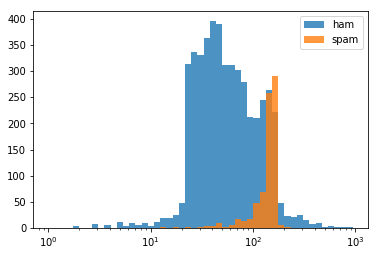

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green>It looks like there's a small range of values where a message is more likely to be spam than ham.</font>

Now let's look at the `punct` column:

In [ ]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

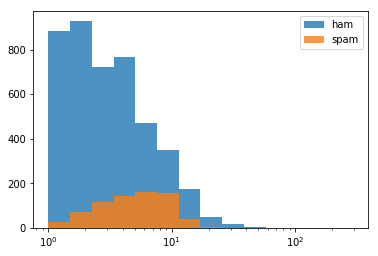

In [ ]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green>This looks even worse - there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results.</font>

___
## Split the data into train & test sets:

If we wanted to divide the DataFrame into two smaller sets, we could use
> `train, test = train_test_split(df)`

For our purposes let's also set up our Features (X) and Labels (y). The Label is simple - we're trying to predict the `label` column in our data. For Features we'll use the `length` and `punct` columns. *By convention, **X** is capitalized and **y** is lowercase.*

### Selecting features
There are two ways to build a feature set from the columns we want. If the number of features is small, then we can pass those in directly:
> `X = df[['length','punct']]`

If the number of features is large, then it may be easier to drop the Label and any other unwanted columns:
> `X = df.drop(['label','message'], axis=1)`

These operations make copies of **df**, but do not change the original DataFrame in place. All the original data is preserved.

In [ ]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

### Additional train/test/split arguments:
The default test size for `train_test_split` is 30%. Here we'll assign 33% of the data for testing.<br>
Also, we can set a `random_state` seed value to ensure that everyone uses the same "random" training & testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


Now we can pass these sets into a series of different training & testing algorithms and compare their results.

___
## Train a Logistic Regression classifier
One of the simplest multi-class classification tools is [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Scikit-learn offers a variety of algorithmic solvers; we'll use [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS). 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Test the Accuracy of the Model

In [ ]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [ ]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


<font color=green>These results are terrible! More spam messages were confused as ham (241) than correctly identified as spam (5), although a relatively small number of ham messages (46) were confused as spam.</font>

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

   micro avg       0.84      0.84      0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.84393692224


<font color=green>This model performed *worse* than a classifier that assigned all messages as "ham" would have!</font>

___
## Train a naïve Bayes classifier:
One of the most common - and successful - classifiers is [naïve Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Run predictions and report on metrics

In [ ]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1583   10]
 [ 246    0]]


<font color=green>The total number of confusions dropped from **287** to **256**. [241+46=287, 246+10=256]</font>

In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

   micro avg       0.86      0.86      0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.860793909734


<font color=green>Better, but still less accurate than 86.6%</font>

___
## Train a support vector machine (SVM) classifier
Among the SVM options available, we'll use [C-Support Vector Classification (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Run predictions and report on metrics

In [ ]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1515   78]
 [ 131  115]]


<font color=green>The total number of confusions dropped even further to **209**.</font>

In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

   micro avg       0.89      0.89      0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839



In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.886351277868


<font color=green>And finally we have a model that performs *slightly* better than random chance.</font>

Great! Now you should be able to load a dataset, divide it into training and testing sets, and perform simple analyses using scikit-learn.


___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Keras Basics

Welcome to the section on deep learning! We'll be using Keras with a TensorFlow backend to perform our deep learning operations.

This means we should get familiar with some Keras fundamentals and basics!

## Imports



In [ ]:
import numpy as np

## Dataset

We will use the famous Iris Data set.
_____
More info on the data set:
https://en.wikipedia.org/wiki/Iris_flower_data_set

## Reading in the Data Set

We've already downloaded the dataset, its in this folder. So let's open it up. 

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris.data

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from keras.utils import to_categorical

In [ ]:
y = to_categorical(y)

In [ ]:
y.shape

(150, 3)

In [ ]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Split the Data into Training and Test

Its time to split the data into a train/test set. Keep in mind, sometimes people like to split 3 ways, train/test/validation. We'll keep things simple for now. **Remember to check out the video explanation as to why we split and what all the parameters mean!**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [ ]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [ ]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
y_test

## Standardizing the Data

Usually when using Neural Networks, you will get better performance when you standardize the data. Standardization just means normalizing the values to all fit between a certain range, like 0-1, or -1 to 1.

The scikit learn library also provides a nice function for this.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_object = MinMaxScaler()

In [ ]:
scaler_object.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_X_train = scaler_object.transform(X_train)

In [ ]:
scaled_X_test = scaler_object.transform(X_test)

Ok, now we have the data scaled!

In [ ]:
X_train.max()

7.7

In [ ]:
scaled_X_train.max()

1.0

In [ ]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [ ]:
scaled_X_train

array([[0.41176471, 0.40909091, 0.55357143, 0.5       ],
       [0.97058824, 0.45454545, 0.98214286, 0.83333333],
       [0.38235294, 0.45454545, 0.60714286, 0.58333333],
       [0.23529412, 0.68181818, 0.05357143, 0.04166667],
       [1.        , 0.36363636, 1.        , 0.79166667],
       [0.44117647, 0.31818182, 0.53571429, 0.375     ],
       [0.26470588, 0.63636364, 0.05357143, 0.04166667],
       [0.20588235, 0.68181818, 0.03571429, 0.08333333],
       [0.23529412, 0.81818182, 0.14285714, 0.125     ],
       [0.20588235, 0.        , 0.42857143, 0.375     ],
       [0.58823529, 0.31818182, 0.67857143, 0.70833333],
       [0.14705882, 0.63636364, 0.14285714, 0.04166667],
       [0.20588235, 0.45454545, 0.08928571, 0.04166667],
       [0.23529412, 0.59090909, 0.10714286, 0.16666667],
       [0.38235294, 0.31818182, 0.55357143, 0.5       ],
       [0.23529412, 0.63636364, 0.07142857, 0.04166667],
       [0.41176471, 0.45454545, 0.55357143, 0.45833333],
       [1.        , 0.81818182,

## Building the Network with Keras

Let's build a simple neural network!

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(  input_dim=4, activation='relu'))
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


## Fit (Train) the Model

In [ ]:
# Play around with number of epochs as well!
model.fit(scaled_X_train,y_train,epochs=150, verbose=2)

Epoch 1/150
 - 0s - loss: 1.0926 - acc: 0.3400
Epoch 2/150
 - 0s - loss: 1.0871 - acc: 0.3400
Epoch 3/150
 - 0s - loss: 1.0814 - acc: 0.3400
Epoch 4/150
 - 0s - loss: 1.0760 - acc: 0.3400
Epoch 5/150
 - 0s - loss: 1.0700 - acc: 0.3400
Epoch 6/150
 - 0s - loss: 1.0640 - acc: 0.3500
Epoch 7/150
 - 0s - loss: 1.0581 - acc: 0.3700
Epoch 8/150
 - 0s - loss: 1.0520 - acc: 0.4200
Epoch 9/150
 - 0s - loss: 1.0467 - acc: 0.5100
Epoch 10/150
 - 0s - loss: 1.0416 - acc: 0.5700
Epoch 11/150
 - 0s - loss: 1.0361 - acc: 0.6300
Epoch 12/150
 - 0s - loss: 1.0308 - acc: 0.6300
Epoch 13/150
 - 0s - loss: 1.0249 - acc: 0.6300
Epoch 14/150
 - 0s - loss: 1.0187 - acc: 0.6200
Epoch 15/150
 - 0s - loss: 1.0124 - acc: 0.6300
Epoch 16/150
 - 0s - loss: 1.0062 - acc: 0.6300
Epoch 17/150
 - 0s - loss: 0.9994 - acc: 0.6400
Epoch 18/150
 - 0s - loss: 0.9919 - acc: 0.6400
Epoch 19/150
 - 0s - loss: 0.9836 - acc: 0.6400
Epoch 20/150
 - 0s - loss: 0.9748 - acc: 0.6400
Epoch 21/150
 - 0s - loss: 0.9649 - acc: 0.6400
E

## Predicting New Unseen Data

Let's see how we did by predicting on **new data**. Remember, our model has **never** seen the test data that we scaled previously! This process is the exact same process you would use on totally brand new data. For example , a brand new bank note that you just analyzed .

In [ ]:
scaled_X_test

In [ ]:
# Spits out probabilities by default.
# model.predict(scaled_X_test)

In [ ]:
model.predict_classes(scaled_X_test)

# Evaluating Model Performance

So how well did we do? How do we actually measure "well". Is 95% accuracy good enough? It all depends on the situation. Also we need to take into account things like recall and precision. Make sure to watch the video discussion on classification evaluation before running this code!

In [ ]:
model.metrics_names

['loss', 'acc']

In [ ]:
model.evaluate(x=scaled_X_test,y=y_test)

50/50 [==============================] - 0s 2ms/step


[0.2843634402751923, 0.96]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
predictions = model.predict_classes(scaled_X_test)

In [ ]:
predictions

array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

In [ ]:
y_test.argmax(axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

In [ ]:
confusion_matrix(y_test.argmax(axis=1),predictions)

array([[19,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 16]], dtype=int64)

In [ ]:
print(classification_report(y_test.argmax(axis=1),predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.87      0.93        15
           2       0.89      1.00      0.94        16

   micro avg       0.96      0.96      0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## Saving and Loading Models

Now that we have a model trained, let's see how we can save and load it.

In [ ]:
model.save('myfirstmodel.h5')

In [ ]:
from keras.models import load_model

In [ ]:
newmodel = load_model('myfirstmodel.h5')

In [ ]:
newmodel.predict_classes(X_test)

array([2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2], dtype=int64)

Great job! You now know how to preprocess data, train a neural network, and evaluate its classification performance!